In [153]:
#imports
import pandas as pd 
import numpy as np

In [154]:
#reading csv into data frame
df = pd.read_csv('player_records.csv')

#initial data read in
df.head()

,Player Number,Age,Sex,Debt,Survival
0,2,tr,Male,tr,survived
1,3,23,tr,heavy debt,survived
2,5,35,tr,debt,survived
3,6,tr,tr,debt,survived
4,7,tr,Female,heavy debt,survived


## Data pre-processing 

In [155]:
#replacing all tr to NaN 
df.replace('tr', np.nan, inplace=True)

In [156]:
#Sex column

#replacing Male and Female with 0 and 1 
df['Sex'].replace(['Male', 'Female'], [0,1], inplace=True)

#forward filling
df['Sex'].fillna(method='ffill', inplace=True)

df['Sex'] = df['Sex'].astype(float)

In [157]:
#Debt column

#replacing NaN in debt
debtArray = ['debt', 'heavy debt']
df['Debt'].fillna(debtArray[np.random.randint(0,2)], inplace=True)

# Define a function to replace 'debt' and 'heavy debt' with random values
def replace_debt(row):
    if row == 'debt':
        return np.random.randint(100000000, 700000001)
    else:
        return np.random.randint(700000001, 1500000000)


# Apply the function to the 'Debt' column
df['Debt'] = df['Debt'].apply(replace_debt)

In [158]:
#Age column

#convert age to float 
df['Age'] = df['Age'].astype(float)

#getting youngest and oldest age
youngest = df['Age'].min()
oldest = df['Age'].max()

#replacing NaN values with a randomly generated number
#between youngest and oldeset
df['Age'] = df['Age'].apply(lambda x: np.random.randint(youngest, oldest + 1) if np.isnan(x) else x)

In [159]:
# Ennumerating survival column

df['Survival'].replace(['survived', 'died'], [0,1], inplace=True)

In [160]:
#Result after cleaning
df.head() 

,Player Number,Age,Sex,Debt,Survival
0,2,58.0,0.0,433128870,0
1,3,23.0,0.0,1484323791,0
2,5,35.0,0.0,270689276,0
3,6,50.0,0.0,237692770,0
4,7,67.0,1.0,885334496,0


## Testing and training sets

In [161]:
#Splitting training and testing sets 
from sklearn.model_selection import train_test_split 

#get the output 
df_output = df['Survival']

#get the inputs 
df_inputs = df.drop(columns=['Survival', 'Player Number'])

df_inputs.head()

#prepare the training and testing datasets by a ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(df_inputs, df_output, test_size=0.3, random_state = 100) 

## Decision trees and confusion matrix 

In [162]:
#Model training using decision trees 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=1) 
dtree.fit(x_train, y_train)

from sklearn import metrics
y_predict = dtree.predict(x_test)
print('Testing accuracy \t', metrics.accuracy_score(y_test, y_predict))


Testing accuracy 	 0.8560606060606061


In [163]:
import matplotlib.pyplot as plt
#Plotting a confusion matrix 
def cf_matrix(mat, t_name, model_name): 
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    
    plt.ylabel('actual label')
    plt.xlabel('predicted label')
    plt.title("Confusion Matrix for " + model_name )

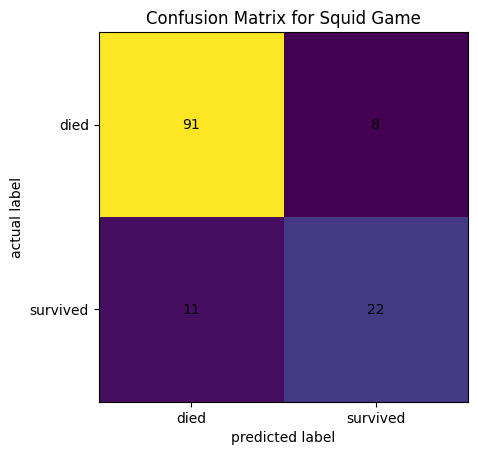

In [164]:
#confusion matrix to show results
cm = metrics.confusion_matrix(y_test, y_predict)
cf_matrix(cm,['died', 'survived'], 'Squid Game')

[Text(0.4583333333333333, 0.875, 'Age <= 23.5\ngini = 0.304\nsamples = 305\nvalue = [248, 57]\nclass = Died'),
 Text(0.25, 0.625, 'Debt <= 797967936.0\ngini = 0.03\nsamples = 133\nvalue = [131, 2]\nclass = Died'),
 Text(0.16666666666666666, 0.375, 'Debt <= 771174624.0\ngini = 0.065\nsamples = 59\nvalue = [57, 2]\nclass = Died'),
 Text(0.08333333333333333, 0.125, 'gini = 0.034\nsamples = 58\nvalue = [57, 1]\nclass = Died'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 74\nvalue = [74, 0]\nclass = Died'),
 Text(0.6666666666666666, 0.625, 'Debt <= 691132320.0\ngini = 0.435\nsamples = 172\nvalue = [117, 55]\nclass = Died'),
 Text(0.5, 0.375, 'Age <= 58.5\ngini = 0.452\nsamples = 58\nvalue = [20, 38]\nclass = Survived'),
 Text(0.4166666666666667, 0.125, 'gini = 0.491\nsamples = 44\nvalue = [19, 25]\nclass = Survived'),
 Text(0.5833333333333334, 0.125, 'gini = 0.133\nsamples = 14\nvalue = [1, 13]\ncla

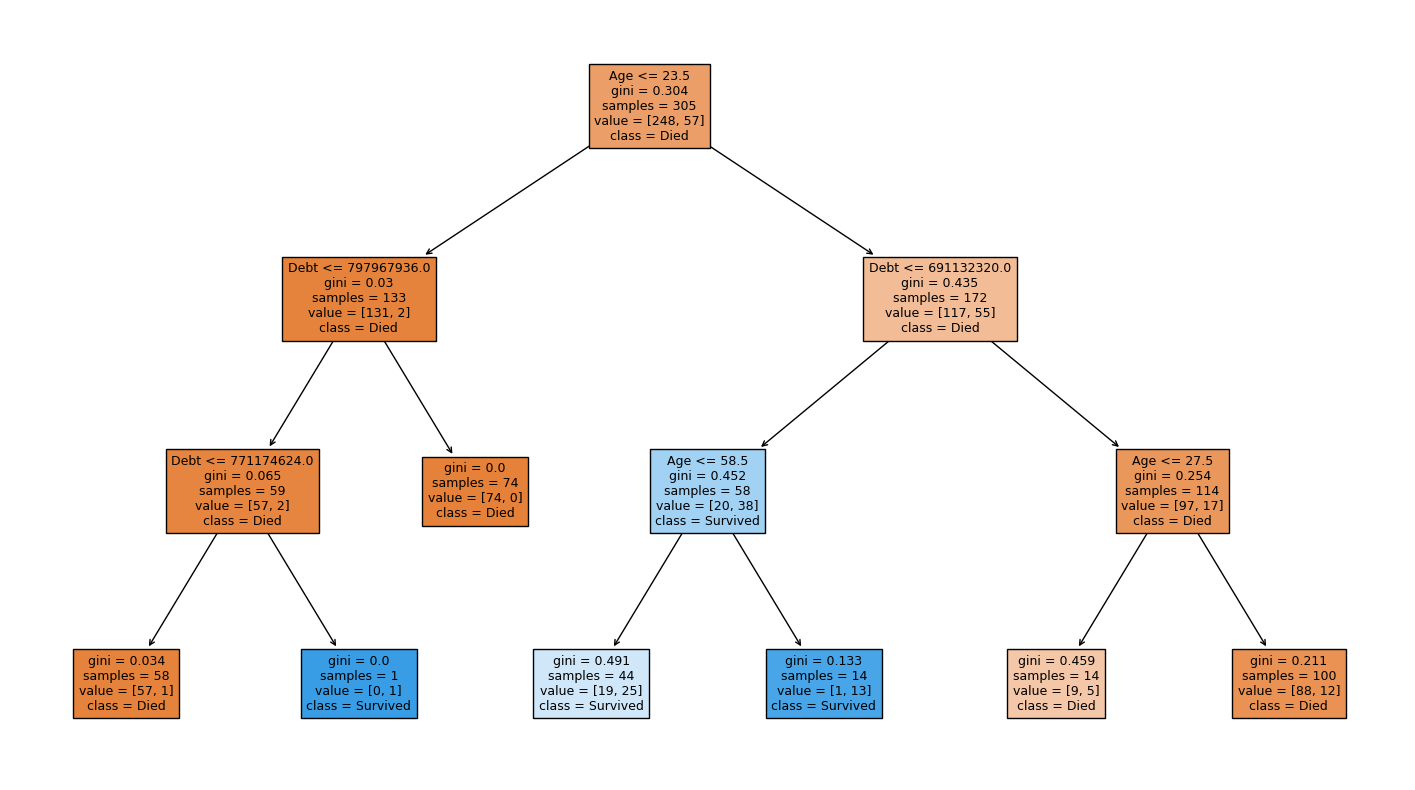

In [165]:
#Visulating the decision tree

from sklearn.tree import plot_tree

features = list(x_train.columns)
output = ['Died', 'Survived']

plt.figure(figsize=(18,10))
plot_tree(dtree, feature_names= features, class_names = output, filled=True, fontsize = 9)